## 1. Import Dependencies

In [ ]:
#Run in conda terminal 
#conda install -c conda-forge box2d-py

In [11]:
!pip install pyglet

  Using cached pyglet-2.1.3-py3-none-any.whl.metadata (7.7 kB)
Using cached pyglet-2.1.3-py3-none-any.whl (962 kB)


In [1]:
import Box2D

In [2]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from IPython.display import display, clear_output
from PIL import Image
import cv2

## 2. Test Environment

In [3]:
env = gym.make('CarRacing-v2', render_mode="rgb_array")

In [4]:
env.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [5]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

In [6]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)

In [7]:
env.render()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

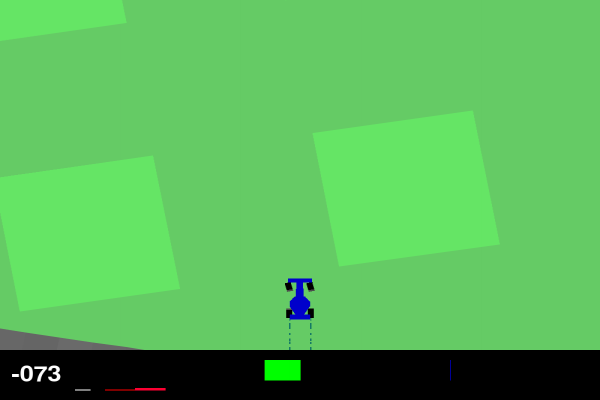

KeyboardInterrupt: 

In [45]:
episodes = 5
episode_scores=[]
for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.render()
        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # Convert to PIL image and display
        img = Image.fromarray(frame)
        clear_output(wait=True)
        display(img)

        action = env.action_space.sample()
        obs, reward, done, info, _ = env.step(action)
        score += reward

    episode_scores.append(score)
    #print(f'Episode {episode}: Score = {score:.2f}')

env.close()

# Print all episodes' scores in final output
print("\nFinal Results:")
for i, score in enumerate(episode_scores, start=1):
    print(f"Episode {i}: Score = {score:.2f}")

## 3. Train Model

In [8]:
env = gym.make('CarRacing-v2', render_mode="rgb_array")
env = DummyVecEnv([lambda:env])

In [9]:
log_path = os.path.join('Training','Logs')
model = PPO('CnnPolicy',env,verbose=1, tensorboard_log=log_path)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [10]:
model.learn(total_timesteps=100000)

Logging to Training\Logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 63   |
|    iterations      | 1    |
|    time_elapsed    | 32   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 60           |
|    iterations           | 2            |
|    time_elapsed         | 67           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0064192405 |
|    clip_fraction        | 0.06         |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.25        |
|    explained_variance   | 0.00984      |
|    learning_rate        | 0.0003       |
|    loss                 | 0.214        |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00602     |
|    std                  | 0.994        |
|    value_loss           | 

## 4. Save Model

In [21]:
ppo_path = os.path.join('Training','Saved Models', 'PPO_100K_Model')

In [16]:
model.save(ppo_path)

In [55]:
del model

In [22]:
ppo_path = os.path.join('Training','Saved Models', 'PPO_100K_Model')

In [23]:
env = gym.make('CarRacing-v2', render_mode="rgb_array")
env = DummyVecEnv([lambda:env])

In [24]:
model = PPO.load(ppo_path, env)

Wrapping the env in a VecTransposeImage.


## 5. Evaluate and Test

In [17]:
evaluate_policy(model, env, n_eval_episodes=5)
#(426.0350626245141, 229.46517291166742)

(426.0350626245141, 229.46517291166742)

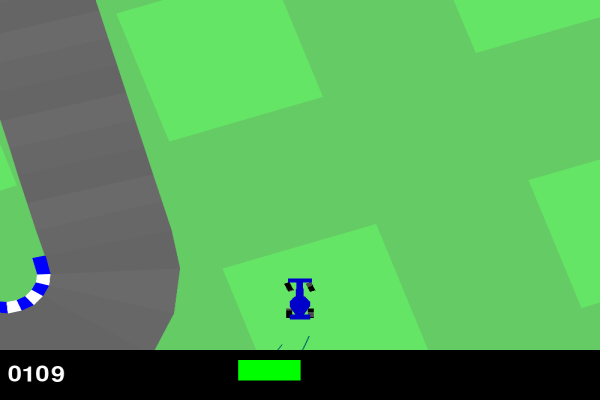

KeyboardInterrupt: 

In [25]:
obs = env.reset()
for i in range(1300):
    action, _states = model.predict(obs, deterministic=True) 
    obs, rewards, dones, info = env.step(action) 

    frame = env.render()
    # Convert RGB to BGR (OpenCV uses BGR format)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Convert to PIL image and display
    img = Image.fromarray(frame)
    clear_output(wait=True)
    display(img)

## 6. Try the game yourself!

In [ ]:
import gymnasium as gym
import numpy as np
import cv2
from IPython.display import display, clear_output
import pygame
from pygame.locals import *
import time  # For slowing down

# Initialize pygame
pygame.init()
screen = pygame.display.set_mode((400, 300))  # Dummy window to capture key events

# Create the environment
env = gym.make("CarRacing-v2", render_mode="rgb_array")
obs, info = env.reset()

running = True
while running:
    pygame.event.pump()  # Process event queue
    keys = pygame.key.get_pressed()  # Get currently pressed keys

    # Default action (no movement)
    action = np.array([0.0, 0.0, 0.0])

    # Set action based on key input
    if keys[K_UP]:
        action[1] = 1.0  # Accelerate
    if keys[K_DOWN]:
        action[2] = 0.8  # Brake
    if keys[K_LEFT]:
        action[0] = -1.0  # Steer left
    if keys[K_RIGHT]:
        action[0] = 1.0  # Steer right

    # Step the environment
    obs, reward, done, truncated, info = env.step(action)

    # Render the frame
    frame = env.render()
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    clear_output(wait=True)
    display(Image.fromarray(frame))

    time.sleep(0.05)  # 🐢 Slow down (Increase for slower)

    if done:  # Reset if game is over
        obs, info = env.reset()

env.close()
pygame.quit()
